# Analisis Sentimen Ulasan Aplikasi TIX ID Menggunakan Metode Klasifikasi Algoritma SVM

# Impor paket yang diperlukan

In [9]:
import pandas as pd

import numpy as np

In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set path untuk data
BASE_PATH = '/content/drive/MyDrive/Kuliah/Semester 4/PENDAT /Ipyb/SVM Sentimen Ulasan TIX ID/'
BASE_PATH_TOOLS = '/content/drive/MyDrive/Kuliah/Semester 4/PENDAT /Ipyb/SVM Sentimen Ulasan TIX ID/tools/'
df_busu = pd.read_csv(BASE_PATH + 'scrapped_TIX ID_EN.csv')

ModuleNotFoundError: No module named 'google'

In [ ]:
len(df_busu.index) #menghitung berapa jumlah data yg didapatkan

NameError: name 'df_busu' is not defined

In [ ]:
df_busu= df_busu.sample(n=10000, random_state=42).reset_index(drop=True) # saya mengambil 10000 data karena akan lama kalo ngeload 28.247 baris

In [ ]:
len(df_busu.index) #menghitung berapa jumlah data yg sudah diambil

10000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #dari dataset tsb didapatkan banyak sekali kolom, kemudian kolom" tsb saya filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,A Google user,5,2019-02-17 08:40:31,so far so good
1,A Google user,5,2018-09-30 09:56:55,Good!
2,A Google user,5,2019-07-27 01:55:24,convenient!
3,A Google user,5,2019-03-10 08:13:39,no antri-antri
4,A Google user,5,2018-12-21 02:53:57,good apps


In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
4865,A Google user,1,2024-12-07 00:38:14,Gak bsa byar pke shopeepay Pas klik gk bsa red...
460,A Google user,5,2024-11-25 14:53:52,Mantapp!
6860,A Google user,5,2024-11-18 03:03:34,Simple and quick!
3591,A Google user,5,2024-10-25 07:34:47,very good
5810,gilang chandra maulana,1,2024-10-15 08:23:02,"loading terus, bete jir"


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian saya simpan ke variabel my_df

In [ ]:
my_df=my_df[['content', 'score']]#karena saya hanya membutuhkan kolom content dan score maka saya lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [ ]:
my_df.head()

,content,score
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1
460,Mantapp!,5
6860,Simple and quick!,5
3591,very good,5
5810,"loading terus, bete jir",1


# **Hapus duplicate**

In [ ]:
my_df.drop_duplicates(subset="content", keep='first', inplace=True)

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6790 entries, 4865 to 5855
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6790 non-null   object
 1   score    6790 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 159.1+ KB


In [ ]:
my_df.head(5)

,content,score
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1
460,Mantapp!,5
6860,Simple and quick!,5
3591,very good,5
5810,"loading terus, bete jir",1


# **Wordcloud**

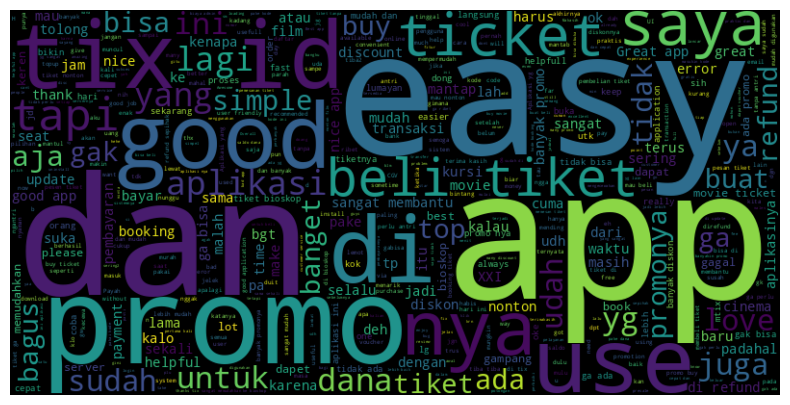

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
my_df['content'] = my_df['content'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['content'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# PEMBERSIHAN DATA
# data cleaning

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url= re.compile(r'https?://\S+/www\.\S+')
        return url.sub(r'', tweet)
    else:
      return tweet

#Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F700-\U0001F77F" # alchemical symbols
            u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F" # Chess Symbols
            u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF" # Additional emoticons
            u"\U0001F1E0-\U0001F1FF" # flags
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

#Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r' [^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers (tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

my_df['cleaning'] = my_df['content'].apply(lambda x: remove_URL(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_html(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_emoji(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_symbols(x))
my_df['cleaning'] = my_df['cleaning'].apply(lambda x: remove_numbers(x))

my_df.head(10)

,content,score,cleaning
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...
460,Mantapp!,5,Mantapp!
6860,Simple and quick!,5,Simple and quick!
3591,very good,5,very good
5810,"loading terus, bete jir",1,"loading terus, bete jir"
4494,It's useless if you want to book tickets long ...,2,It's useless if you want to book tickets long ...
5130,Good,5,Good
8326,Nice and helpfull application,5,Nice and helpfull application
1325,Awesome,5,Awesome
2181,senengg bangettt,5,senengg bangettt


# Text PreProcessing

# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

my_df['case_folding'] = my_df['cleaning'].apply(case_folding)
my_df.head(5)

,content,score,cleaning,case_folding
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...
460,Mantapp!,5,Mantapp!,mantapp!
6860,Simple and quick!,5,Simple and quick!,simple and quick!
3591,very good,5,very good,very good
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir"


### **Normalisasi Kata**

In [ ]:
import pandas as pd

#Fungsi penggantian kata tidak baku
def replace_taboo_words (text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku [word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash (word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = text
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca Dataset
data = pd.DataFrame(my_df[['content', 'score', 'cleaning', 'case_folding']])
data.head(5)

,content,score,cleaning,case_folding
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...
460,Mantapp!,5,Mantapp!,mantapp!
6860,Simple and quick!,5,Simple and quick!,simple and quick!
3591,very good,5,very good,very good
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir"


In [ ]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel(BASE_PATH_TOOLS + "kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi pengganti kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

my_df = pd.DataFrame(data[['content', 'score', 'cleaning', 'case_folding', 'normalisasi']])
my_df.head(10)

,content,score,cleaning,case_folding,normalisasi
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...
460,Mantapp!,5,Mantapp!,mantapp!,mantapp!
6860,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!
3591,very good,5,very good,very good,very good
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir"
4494,It's useless if you want to book tickets long ...,2,It's useless if you want to book tickets long ...,it's useless if you want to book tickets long ...,it's useless if you want tapi book tickets lon...
5130,Good,5,Good,good,good
8326,Nice and helpfull application,5,Nice and helpfull application,nice and helpfull application,nice and helpfull application
1325,Awesome,5,Awesome,awesome,awesome
2181,senengg bangettt,5,senengg bangettt,senengg bangettt,senang banget


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

my_df['tokenize'] = my_df['normalisasi'].apply(tokenize)
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"[tidak, bisa, byar, pakai, shopeepay, pas, kli..."
460,Mantapp!,5,Mantapp!,mantapp!,mantapp!,[mantapp!]
6860,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"[simple, and, quick!]"
3591,very good,5,very good,very good,very good,"[very, good]"
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","[loading, terus,, bete, jir]"


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, saya dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

my_df['stopword removal'] = my_df['tokenize'].apply(remove_stopwords)

my_df.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"[tidak, bisa, byar, pakai, shopeepay, pas, kli...","[byar, pakai, shopeepay, pas, klik, redirect....."
460,Mantapp!,5,Mantapp!,mantapp!,mantapp!,[mantapp!],[mantapp!]
6860,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"[simple, and, quick!]","[simple, and, quick!]"
3591,very good,5,very good,very good,very good,"[very, good]","[very, good]"
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","[loading, terus,, bete, jir]","[loading, terus,, bete, jir]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia saya dapat menggunakan library Python Sastrawi yang sudah saya siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

my_df['steming_data'] = my_df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
my_df.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
4865,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"[tidak, bisa, byar, pakai, shopeepay, pas, kli...","[byar, pakai, shopeepay, pas, klik, redirect.....",byar pakai shopeepay pas klik redirect gk canc...
460,Mantapp!,5,Mantapp!,mantapp!,mantapp!,[mantapp!],[mantapp!],mantapp
6860,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"[simple, and, quick!]","[simple, and, quick!]",simple and quick
3591,very good,5,very good,very good,very good,"[very, good]","[very, good]",very good
5810,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","[loading, terus,, bete, jir]","[loading, terus,, bete, jir]",loading terus bete jir


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6790 entries, 4865 to 5855
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6790 non-null   object
 1   score             6790 non-null   int64 
 2   cleaning          6790 non-null   object
 3   case_folding      6790 non-null   object
 4   normalisasi       6790 non-null   object
 5   tokenize          6790 non-null   object
 6   stopword removal  6790 non-null   object
 7   steming_data      6790 non-null   object
dtypes: int64(1), object(7)
memory usage: 477.4+ KB


In [ ]:
my_df.to_csv(BASE_PATH + "hasil_TextPreProcessing_shopee.csv", index= False) #kemudian simpan hasil text preprocessing ke file csv

### **WORDCLOUD SETELAH PREPROCESSING**

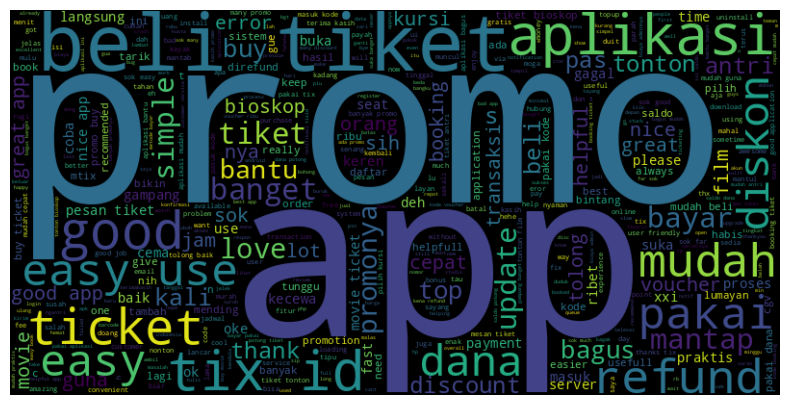

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'content'
text = ' '.join(my_df['steming_data'].astype(str).tolist())

stopwords=set (STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

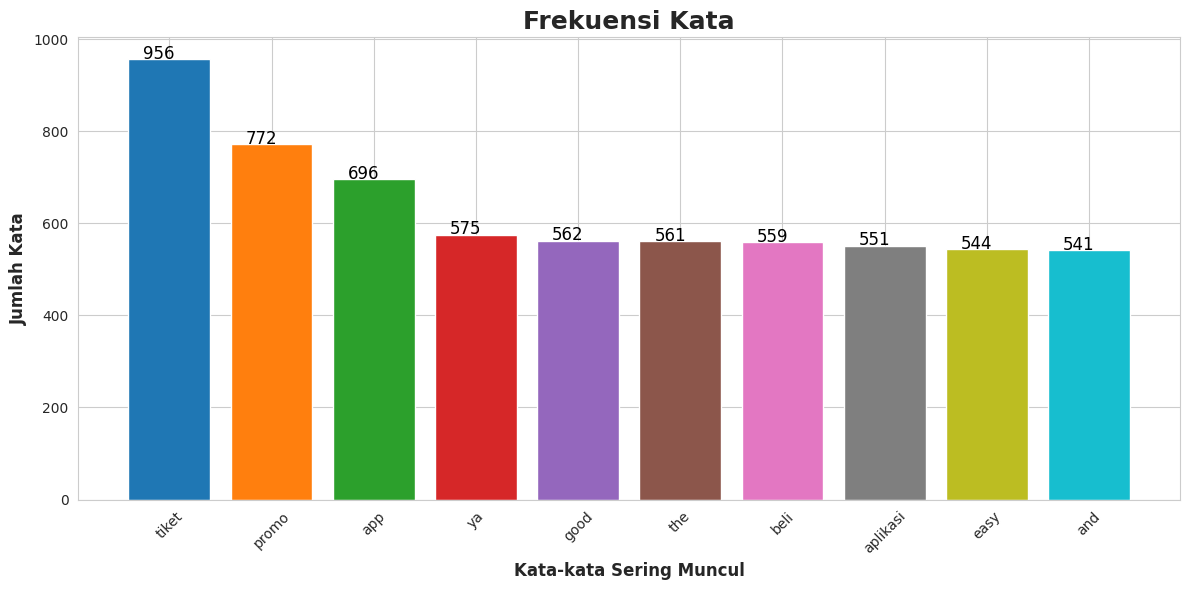

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua teks
text = " ".join(my_df['steming_data'])

tokens = text.split()
# Hitung frekuensi kata
word_count = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_word = word_count.most_common(10)

# Pisahkan menjadi dua list: kata dan jumlahnya
word, count = zip(*top_word)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan label angka di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()


# **Labelling Data Lexicon Based**
Link github label positif & Negatif :  https://github.com/fajri91/InSet

In [ ]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_TextPreProcessing_shopee.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"['tidak', 'bisa', 'byar', 'pakai', 'shopeepay'...","['byar', 'pakai', 'shopeepay', 'pas', 'klik', ...",byar pakai shopeepay pas klik redirect gk canc...
1,Mantapp!,5,Mantapp!,mantapp!,mantapp!,['mantapp!'],['mantapp!'],mantapp
2,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"['simple', 'and', 'quick!']","['simple', 'and', 'quick!']",simple and quick
3,very good,5,very good,very good,very good,"['very', 'good']","['very', 'good']",very good
4,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","['loading', 'terus,', 'bete', 'jir']","['loading', 'terus,', 'bete', 'jir']",loading terus bete jir


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6790 entries, 0 to 6789
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6790 non-null   object
 1   score             6790 non-null   int64 
 2   cleaning          6741 non-null   object
 3   case_folding      6741 non-null   object
 4   normalisasi       6740 non-null   object
 5   tokenize          6790 non-null   object
 6   stopword removal  6790 non-null   object
 7   steming_data      6714 non-null   object
dtypes: int64(1), object(7)
memory usage: 424.5+ KB


In [ ]:
# Jika ada data kosong maka di drop
my_df = data.dropna()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6714 entries, 0 to 6789
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6714 non-null   object
 1   score             6714 non-null   int64 
 2   cleaning          6714 non-null   object
 3   case_folding      6714 non-null   object
 4   normalisasi       6714 non-null   object
 5   tokenize          6714 non-null   object
 6   stopword removal  6714 non-null   object
 7   steming_data      6714 non-null   object
dtypes: int64(1), object(7)
memory usage: 472.1+ KB


In [ ]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return 'Positif'
    elif positive_count < negative_count:
        return 'Negatif'

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'positive.tsv', sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(BASE_PATH_TOOLS + 'negative.tsv', sep='\t', header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())

my_df.head(10)


/tmp/ipython-input-202-341034993.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = my_df['steming_data'].apply(determine_sentiment)
/tmp/ipython-input-202-341034993.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Sentiment'] = replace_none_sentiment(my_df['Sentiment'].tolist())


,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"['tidak', 'bisa', 'byar', 'pakai', 'shopeepay'...","['byar', 'pakai', 'shopeepay', 'pas', 'klik', ...",byar pakai shopeepay pas klik redirect gk canc...,Positif
1,Mantapp!,5,Mantapp!,mantapp!,mantapp!,['mantapp!'],['mantapp!'],mantapp,Negatif
2,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"['simple', 'and', 'quick!']","['simple', 'and', 'quick!']",simple and quick,Positif
3,very good,5,very good,very good,very good,"['very', 'good']","['very', 'good']",very good,Positif
4,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","['loading', 'terus,', 'bete', 'jir']","['loading', 'terus,', 'bete', 'jir']",loading terus bete jir,Negatif
5,It's useless if you want to book tickets long ...,2,It's useless if you want to book tickets long ...,it's useless if you want to book tickets long ...,it's useless if you want tapi book tickets lon...,"[""it's"", 'useless', 'if', 'you', 'want', 'tapi...","[""it's"", 'useless', 'if', 'you', 'want', 'book...",it s useless if you want book tickets long bef...,Positif
6,Good,5,Good,good,good,['good'],['good'],good,Positif
7,Nice and helpfull application,5,Nice and helpfull application,nice and helpfull application,nice and helpfull application,"['nice', 'and', 'helpfull', 'application']","['nice', 'and', 'helpfull', 'application']",nice and helpfull application,Positif
8,Awesome,5,Awesome,awesome,awesome,['awesome'],['awesome'],awesome,Positif
9,senengg bangettt,5,senengg bangettt,senengg bangettt,senang banget,"['senang', 'banget']","['senang', 'banget']",senang banget,Positif


/tmp/ipython-input-203-2336621753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")


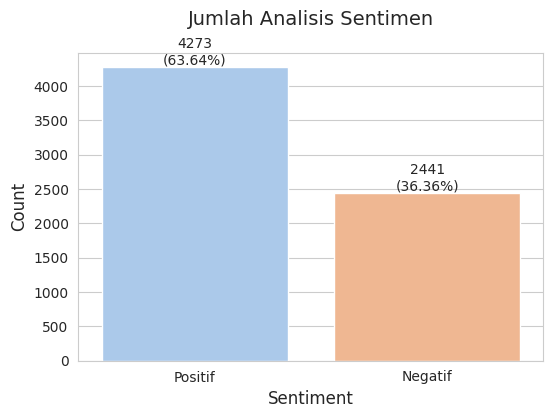

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = my_df['Sentiment'].value_counts()
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="pastel")
plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

total = len(my_df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10,f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
my_df.to_csv(BASE_PATH + "hasil_Labelling_Data.csv",encoding='utf8', index= False) #kemudian simpan hasil text preprocessing ke file csv

# **ALGORITMA SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head(5)

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"['tidak', 'bisa', 'byar', 'pakai', 'shopeepay'...","['byar', 'pakai', 'shopeepay', 'pas', 'klik', ...",byar pakai shopeepay pas klik redirect gk canc...,Positif
1,Mantapp!,5,Mantapp!,mantapp!,mantapp!,['mantapp!'],['mantapp!'],mantapp,Negatif
2,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"['simple', 'and', 'quick!']","['simple', 'and', 'quick!']",simple and quick,Positif
3,very good,5,very good,very good,very good,"['very', 'good']","['very', 'good']",very good,Positif
4,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","['loading', 'terus,', 'bete', 'jir']","['loading', 'terus,', 'bete', 'jir']",loading terus bete jir,Negatif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6714 non-null   object
 1   score             6714 non-null   int64 
 2   cleaning          6714 non-null   object
 3   case_folding      6714 non-null   object
 4   normalisasi       6714 non-null   object
 5   tokenize          6714 non-null   object
 6   stopword removal  6714 non-null   object
 7   steming_data      6714 non-null   object
 8   Sentiment         6714 non-null   object
dtypes: int64(1), object(8)
memory usage: 472.2+ KB


In [ ]:
my_df = data.dropna()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6714 non-null   object
 1   score             6714 non-null   int64 
 2   cleaning          6714 non-null   object
 3   case_folding      6714 non-null   object
 4   normalisasi       6714 non-null   object
 5   tokenize          6714 non-null   object
 6   stopword removal  6714 non-null   object
 7   steming_data      6714 non-null   object
 8   Sentiment         6714 non-null   object
dtypes: int64(1), object(8)
memory usage: 472.2+ KB


**Spliting Data**

memecah data test 20% dari keseluruhan data

In [ ]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(my_df['steming_data'], my_df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'Sentiment': y_train})
train_set.to_csv(BASE_PATH + 'train_data.csv', index=False)

In [ ]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'Sentiment': y_test})
test_set.to_csv(BASE_PATH + 'test_data.csv', index=False)

In [ ]:
# Menampilkan informasi jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 5371
Jumlah data uji: 1343


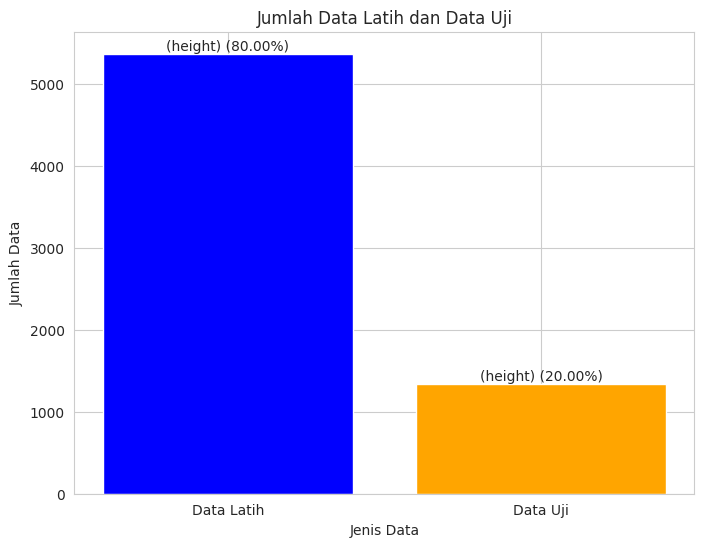

In [ ]:
import matplotlib.pyplot as plt

#Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars= plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'(height) ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

### **SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

#menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Membuat dan melatih model SVM (model jenis linear)
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluasi model
y_pred_svm = svm.predict(X_test_vectorized)

In [ ]:
# Menampilkan confusion matrix dalam angka
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(cm_svm)

Confusion Matrix (SVM):
[[312 191]
 [ 84 756]]


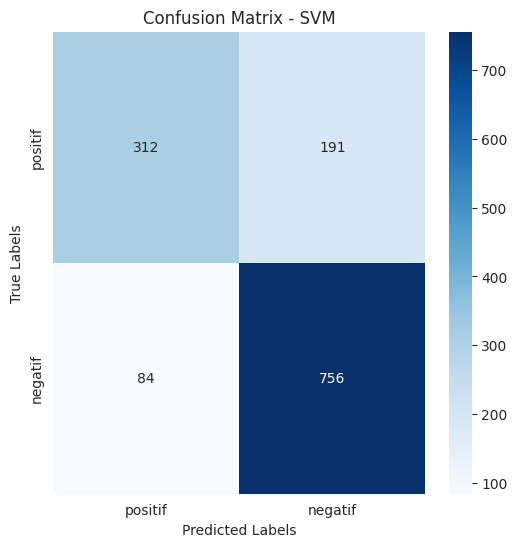

In [ ]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])

    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix('SVM', y_test, y_pred_svm)

In [ ]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

#Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.62      0.69       503
     Positif       0.80      0.90      0.85       840

    accuracy                           0.80      1343
   macro avg       0.79      0.76      0.77      1343
weighted avg       0.79      0.80      0.79      1343



# **WORDCLOUD**

In [ ]:
import pandas as pd

data = pd.read_csv(BASE_PATH + 'hasil_Labelling_Data.csv')
data.head()

,content,score,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Gak bsa byar pke shopeepay Pas klik gk bsa red...,gak bsa byar pke shopeepay pas klik gk bsa red...,tidak bisa byar pakai shopeepay pas klik tidak...,"['tidak', 'bisa', 'byar', 'pakai', 'shopeepay'...","['byar', 'pakai', 'shopeepay', 'pas', 'klik', ...",byar pakai shopeepay pas klik redirect gk canc...,Positif
1,Mantapp!,5,Mantapp!,mantapp!,mantapp!,['mantapp!'],['mantapp!'],mantapp,Negatif
2,Simple and quick!,5,Simple and quick!,simple and quick!,simple and quick!,"['simple', 'and', 'quick!']","['simple', 'and', 'quick!']",simple and quick,Positif
3,very good,5,very good,very good,very good,"['very', 'good']","['very', 'good']",very good,Positif
4,"loading terus, bete jir",1,"loading terus, bete jir","loading terus, bete jir","loading terus, bete jir","['loading', 'terus,', 'bete', 'jir']","['loading', 'terus,', 'bete', 'jir']",loading terus bete jir,Negatif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif'] ['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif'] ['steming_data'].str.cat(sep=' ')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

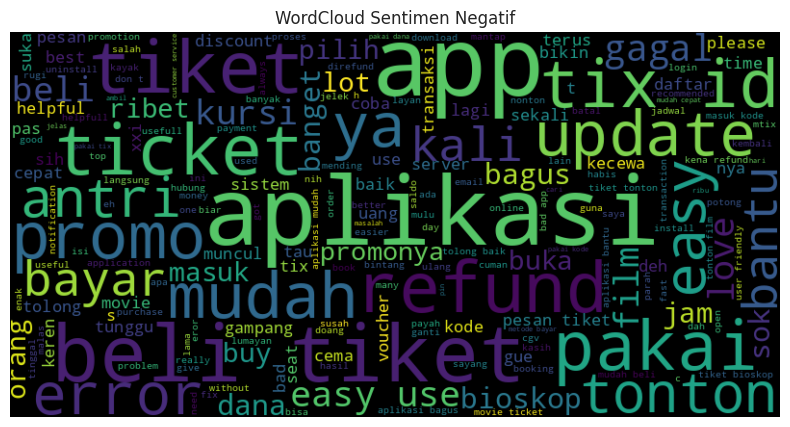

In [ ]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

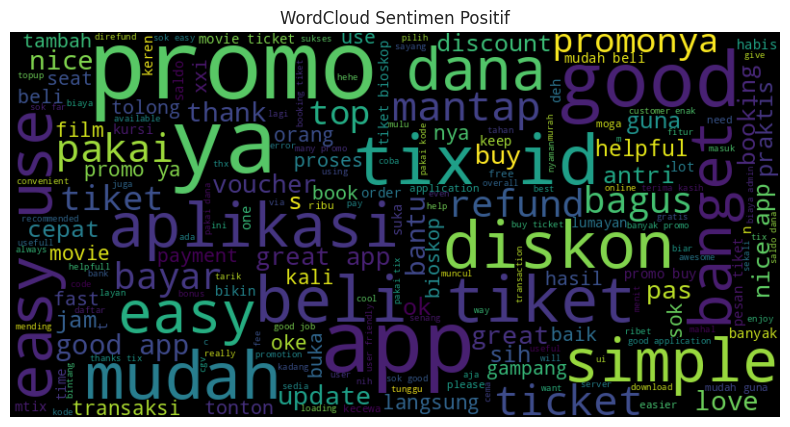

In [ ]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

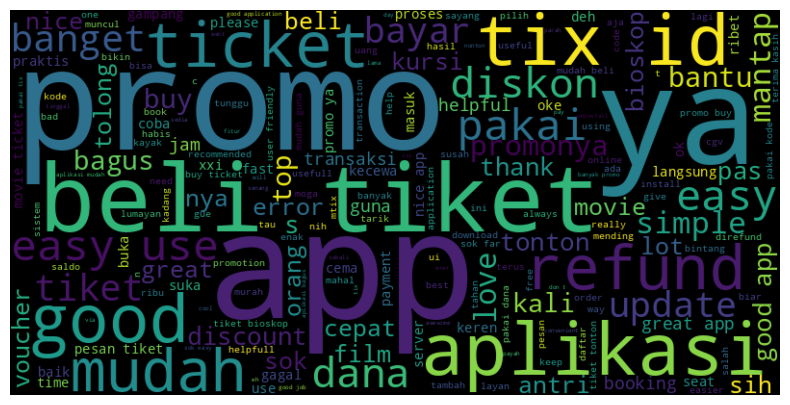

In [ ]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## **RATING**

In [ ]:
import pandas as pd

data = pd.read_csv(BASE_PATH + "hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           6714 non-null   object
 1   score             6714 non-null   int64 
 2   cleaning          6714 non-null   object
 3   case_folding      6714 non-null   object
 4   normalisasi       6714 non-null   object
 5   tokenize          6714 non-null   object
 6   stopword removal  6714 non-null   object
 7   steming_data      6714 non-null   object
 8   Sentiment         6714 non-null   object
dtypes: int64(1), object(8)
memory usage: 472.2+ KB


In [11]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

NameError: name 'data' is not defined